Step 1: Import Libraries

In [171]:
import torch

import torch.nn as nn

import torch.optim  as optim

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

Step 2: Generate Sample Data

We create a simple dataset for classification.

In [172]:
# Create synthetic dataset (binary classification problem)

torch.manual_seed(42)

X = torch.randn(1000, 2)

y = (X[:,0] * X[:,1] > 0).float().unsqueeze(1) # XOR-like pattern

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Step 3: Define Neural Networks (With and Without Dropout)

In [173]:
# Neural network WITHOUT Dropout

class NeuralNet_NoDropout(nn.Module):

    def __init__(self):
        super(NeuralNet_NoDropout, self).__init__()

        self.fc1 = nn.Linear(2, 128)

        self.fc2 = nn.Linear(128, 64)

        self.fc3 = nn.Linear(64, 1)

        self.relu = nn.ReLU()

        self.sigmoid = nn.Sigmoid()

    def forward(self,x):

        x = self.relu(self.fc1(x))

        x = self.relu(self.fc2(x))

        x = self.sigmoid(self.fc3(x))

        return x

In [174]:
# Neural network WITH Dropout

class NeuralNet_Dropout(nn.Module):

    def __init__(self):
        super(NeuralNet_Dropout, self).__init__()

        self.fc1 = nn.Linear(2, 128)

        self.fc2 = nn.Linear(128, 64)

        self.fc3 = nn.Linear(64, 1)

        self.relu = nn.ReLU()

        self.sigmoid = nn.Sigmoid()

        self.dropout = nn.Dropout(0.5) # Dropout layer (50% neurons randomly deactivated)

    def forward(self,x):

        x = self.relu(self.fc1(x))

        x = self.dropout(x) # Apply dropout

        x = self.relu(self.fc2(x))

        x = self.dropout(x) # Apply dropout

        x = self.sigmoid(self.fc3(x))

        return x

Step 4: Train Both Models

In [175]:
def train_model(model, X_train, y_train, X_test, y_test, epochs=200, lr=0.1):

    optimizer = optim.Adam(model.parameters(), lr=lr)

    loss_fn = nn.BCELoss()

    train_losses , test_losses = [], []


    for epoch in range(epochs):

        model.train()

        optimizer.zero_grad()

        y_pred = model(X_train)

        # y_pred = torch.sigmoid(y_pred)  # ✅ Ensure values are in (0,1)


        loss = loss_fn(y_pred, y_train)

        loss.backward()

        optimizer.step()

        train_losses.append(loss.item())


        # Evaluate on test set

        model.eval()

        with torch.no_grad():

                y_pred_test = model(X_test)

                test_loss = loss_fn(y_pred_test, y_test)

                test_losses.append(test_loss.item())

        if epoch % 50 == 0:

            print(f'Epoch: {epoch}/{epochs} - Train loss: {loss.item():.4f} - Test Loss: {test_loss.item():.4f}')  # ✅ Fixed


    
    return train_losses, test_losses

In [176]:
# Train both models

model_no_dropout = NeuralNet_NoDropout()

model_dropout = NeuralNet_Dropout()

train_loss_no_dropout, test_loss_no_dropout = train_model(model_no_dropout, X_train, y_train ,X_test, y_test)

train_loss_dropout, test_loss_dropout = train_model(model_dropout, X_train, y_train, X_test, y_test)


Epoch: 0/200 - Train loss: 0.6828 - Test Loss: 0.4827
Epoch: 50/200 - Train loss: 0.0096 - Test Loss: 0.0196
Epoch: 100/200 - Train loss: 0.0037 - Test Loss: 0.0181
Epoch: 150/200 - Train loss: 0.0023 - Test Loss: 0.0185
Epoch: 0/200 - Train loss: 0.6996 - Test Loss: 0.4232
Epoch: 50/200 - Train loss: 0.2919 - Test Loss: 0.1088
Epoch: 100/200 - Train loss: 0.1783 - Test Loss: 0.1178
Epoch: 150/200 - Train loss: 0.1627 - Test Loss: 0.1298


Step 5: Visualizing Training & Test Loss

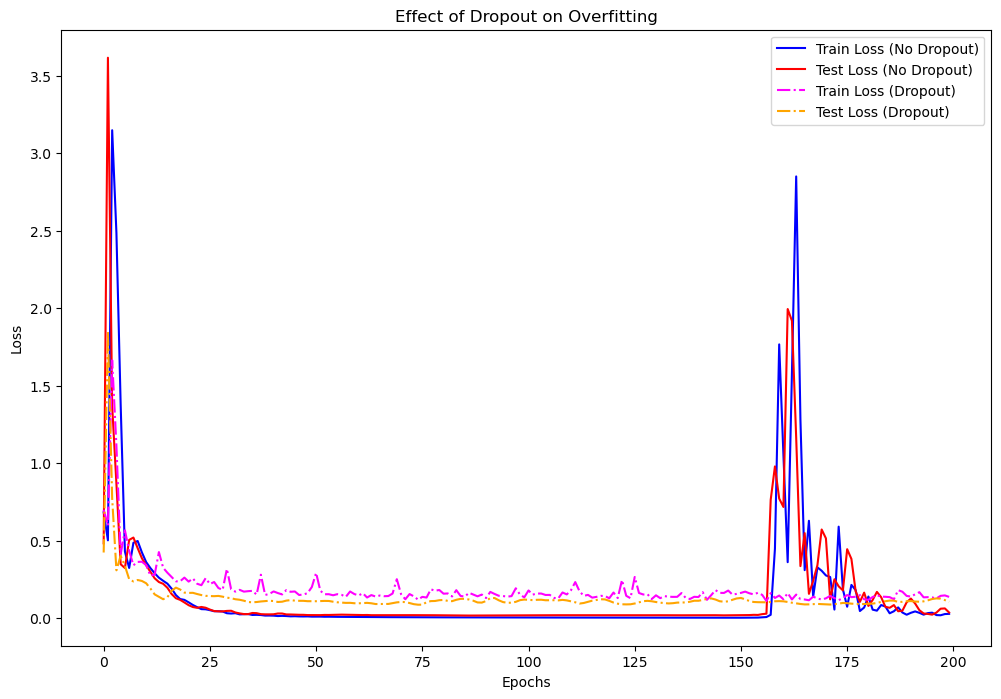

In [177]:
plt.figure(figsize=(12,8))

plt.plot(train_loss_no_dropout, label="Train Loss (No Dropout)", linestyle="solid", color="blue")

plt.plot(test_loss_no_dropout, label="Test Loss (No Dropout)",linestyle="solid" ,color="red")

plt.plot(train_loss_dropout, label="Train Loss (Dropout)", linestyle="dashdot", color="magenta")

plt.plot(test_loss_dropout, label="Test Loss (Dropout)",linestyle="dashdot", color="orange")

plt.xlabel("Epochs")

plt.ylabel("Loss")

plt.legend()

plt.title("Effect of Dropout on Overfitting")

plt.show()

Observations

Without Dropout:

Train loss keeps decreasing significantly.
Test loss starts increasing, indicating overfitting.

With Dropout:

The model generalizes better, as test loss remains stable.
It prevents the model from over-relying on specific neurons.

Conclusion

Dropout is an effective regularization technique that prevents neural networks from memorizing data (overfitting). 
It helps improve the generalization of models, especially in deep networks. 